In [3]:
import math

# Given values
initial_price = 0.00000001
target_mc = 70000  # Target market cap in USD
a = 0.6015  # Coefficient in the bonding curve formula
b = 0.00003606  # Exponent coefficient in the bonding curve formula

# Calculate initial market cap (x0)
def calculate_initial_mc(initial_price, a, b):
    x0 = -math.log(initial_price / a) / b
    return x0

# Calculate final price at the target market cap
def calculate_final_price(target_mc, a, b):
    final_price = a * math.exp(b * target_mc)
    return final_price

# Perform calculations
initial_mc = calculate_initial_mc(initial_price, a, b)
final_price = calculate_final_price(target_mc, a, b)

# Print results
print(f"Initial Market Cap: ${initial_mc:.2f}")
print(f"Final Price at Target Market Cap of ${target_mc}: ${final_price:.6f}")


Initial Market Cap: $496737.44
Final Price at Target Market Cap of $70000: $7.507265


In [14]:
supply=800000000
price_i=2.8e-8
MC=supply*price_i
MC

22.4

In [15]:
MC=60000
supply=800000000
price_f=MC/supply
price_f

7.5e-05

In [9]:
price_f/price_i

59.99999999999999

In [16]:
import math
from scipy.integrate import quad

# Bonding curve parameters
a = 0.6015
b = 0.00003606

# Market cap range
x1 = 1_000_000  # Initial market cap in USD
x2 = 10_000_000  # Target market cap in USD

# Bonding curve function
def bonding_curve(x):
    return a * math.exp(b * x)

# Calculate the integral
total_cost, _ = quad(bonding_curve, x1, x2)

# Print results
print(f"Total USD required to push the market cap from ${x1} to ${x2}: ${total_cost:.2f}")


Total USD required to push the market cap from $1000000 to $10000000: $67421759736372025290788889359397932661627556338199027172546676100416685666784041227548002818972797615988896744633948294363413946472112152558203647642413178028032.00


In [24]:
# Given parameters
a = 0.6015
b = 0.00003606

# Initial market cap
initial_mc = 20  

# Calculate the price per 10 million tokens at the initial market cap
y_initial = a * math.exp(b * initial_mc)
y_initial/10e6


6.019339582665415e-08

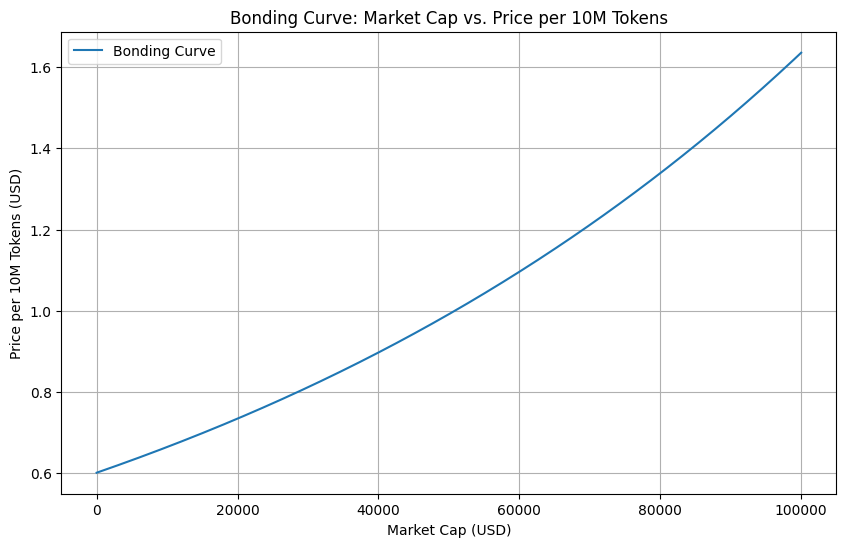

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Given parameters
a = 0.6015
b = 0.00001

# Market cap range
x_values = np.linspace(0, 100000, 400)  # Market cap from 0 to 100,000 USD

# Calculate the price per 10 million tokens for each market cap
y_values = a * np.exp(b * x_values)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Bonding Curve')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Price per 10M Tokens (USD)')
plt.title('Bonding Curve: Market Cap vs. Price per 10M Tokens')
plt.legend()
plt.grid(True)
plt.show()


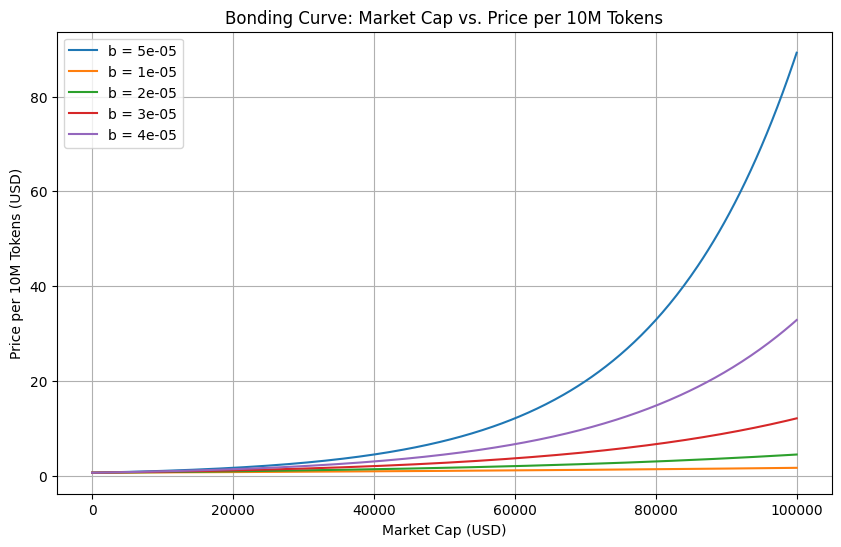

In [27]:
# Different values of b to compare
b_values = [0.00005, 0.00001, 0.00002, 0.00003, 0.00004]

# Plot the graph with different values of b
plt.figure(figsize=(10, 6))

for b in b_values:
    y_values = a * np.exp(b * x_values)
    plt.plot(x_values, y_values, label=f'b = {b}')

plt.xlabel('Market Cap (USD)')
plt.ylabel('Price per 10M Tokens (USD)')
plt.title('Bonding Curve: Market Cap vs. Price per 10M Tokens')
plt.legend()
plt.grid(True)
plt.show()


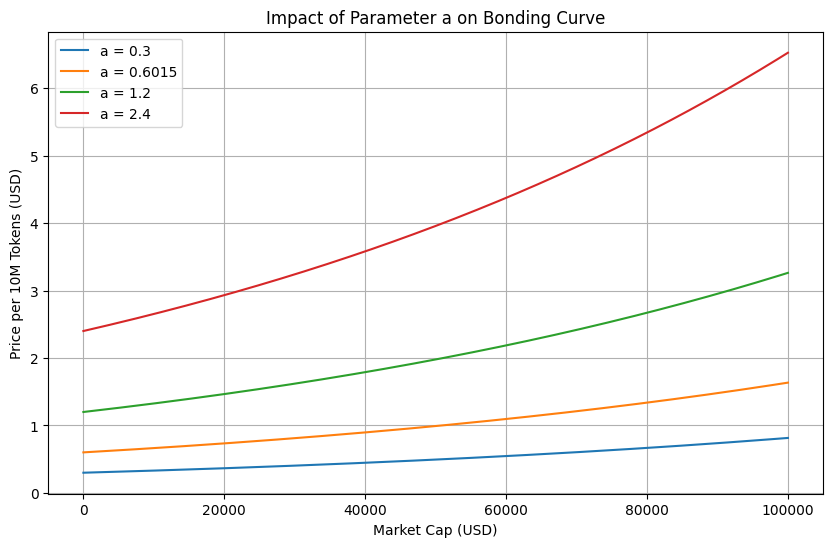

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Different values of a to compare
a_values = [0.3, 0.6015, 1.2, 2.4]

# Fixed value of b
b = 0.00001

# Market cap range
x_values = np.linspace(0, 100000, 400)  # Market cap from 0 to 100,000 USD

# Plot the graph with different values of a
plt.figure(figsize=(10, 6))

for a in a_values:
    y_values = a * np.exp(b * x_values)
    plt.plot(x_values, y_values, label=f'a = {a}')

plt.xlabel('Market Cap (USD)')
plt.ylabel('Price per 10M Tokens (USD)')
plt.title('Impact of Parameter a on Bonding Curve')
plt.legend()
plt.grid(True)
plt.show()


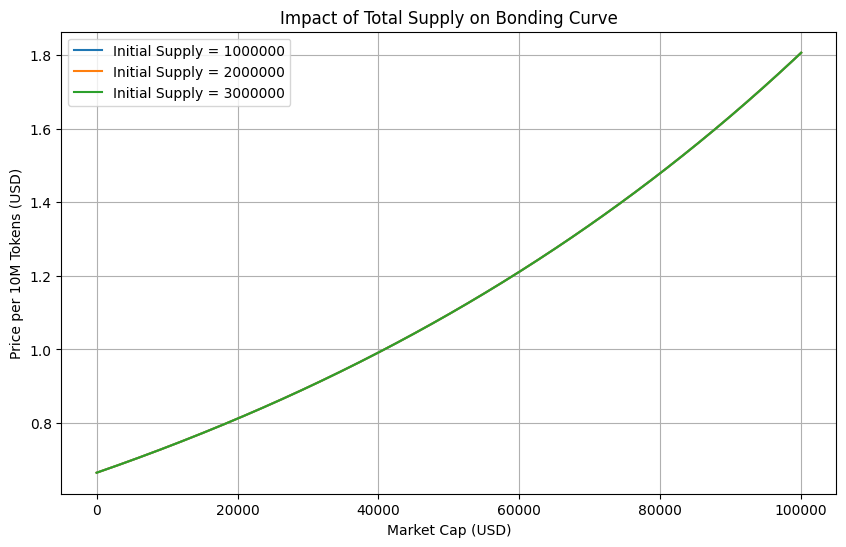

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Different initial supplies to compare
initial_supplies = [1_000_000, 2_000_000, 3_000_000]

# Initial market cap
initial_mc = 10_000  # Initial market cap in USD

# Fixed bonding curve parameters
a = 0.6015
b = 0.00001

# Market cap range
x_values = np.linspace(0, 100000, 400)  # Market cap from 0 to 100,000 USD

# Plot the graph with different initial supplies
plt.figure(figsize=(10, 6))

for initial_supply in initial_supplies:
    initial_price = initial_mc / initial_supply
    y_values = a * np.exp(b * (x_values + initial_price * initial_supply))
    plt.plot(x_values, y_values, label=f'Initial Supply = {initial_supply}')

plt.xlabel('Market Cap (USD)')
plt.ylabel('Price per 10M Tokens (USD)')
plt.title('Impact of Total Supply on Bonding Curve')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import math

# Given parameters
a = 0.004
b = 0.00001

# Initial conditions
initial_mc = 10_000  # Initial market cap in USD
tokens_bought = 10_000_000  # Number of tokens bought

# Calculate initial price
y_initial = a * math.exp(b * initial_mc)

# Calculate the increase in market cap
delta_market_cap = tokens_bought * y_initial

# Calculate the new market cap
x_new = initial_mc + delta_market_cap

# Calculate the new price
y_new = a * math.exp(b * x_new)

# Calculate the price increase
price_increase = y_new - y_initial

y_initial, y_new, price_increase


(0.004420683672302591, 0.006878239470955765, 0.002457555798653174)

In [1]:
import math

def calculate_market_cap_change(a, b, x_initial, delta_tokens):
    # Calculate the initial price
    y_initial = a * math.exp(b * x_initial)
    
    # Calculate the amount spent
    delta_mc = delta_tokens * y_initial
    
    # Update the market cap
    x_new = x_initial + delta_mc
    
    # Calculate the new price
    y_new = a * math.exp(b * x_new)
    
    return x_initial, y_initial, x_new, y_new, delta_mc

# Given parameters
a = 0.006015
b = 0.0000001
x_initial = 1_000_000  # Initial market cap in USD
delta_tokens = 10000  # Number of tokens bought

# Calculate the changes
x_initial, y_initial, x_new, y_new, delta_mc = calculate_market_cap_change(a, b, x_initial, delta_tokens)

x_initial, y_initial, x_new, y_new, delta_mc


(1000000,
 0.006647603072225021,
 1000066.4760307223,
 0.006647647262998508,
 66.47603072225021)

# Final Approach

(0.0008483428982440725, 1.6447036378529e-07)

54721.10471981034

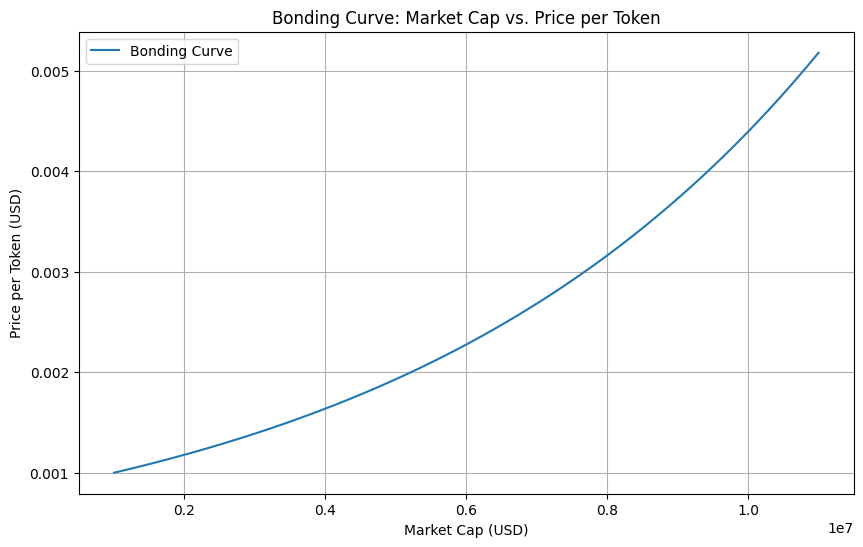

Tokens purchased for 1 ETH: 3140.3111004994335
ETH received for selling 3140.3111004994335 tokens: 1.0000000000000002
